In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sms 
from numpy.fft import fft, ifft, ifftshift, fftshift

In [2]:
npaths = 20000  # number of paths
T = 1  # time horizon
nsteps = 200  # number of time steps
dt = T / nsteps  # time step
t = np.linspace(0, T, nsteps+1)  # observation times
mu = 0.1
sigma = 0.2
S0 = 1  # initial stock price

# Monte Carlo
dX = (mu - 0.5 * sigma**2) * dt + sigma * np.random.randn(npaths, nsteps) * np.sqrt(dt)
X = np.column_stack([np.zeros(npaths), np.cumsum(dX, axis=1)])
# X = np.vstack([np.zeros(nsteps), np.cumsum(dX, axis=0)])

# Transform to geometric Brownian motion
S = S0 * np.exp(X)

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86794/1488875202.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Geometric Brownian motion $dS = \mu S dt + \sigma S dW$')


Text(0.5, 1.0, 'Geometric Brownian motion $dS = \\mu S dt + \\sigma S dW$')

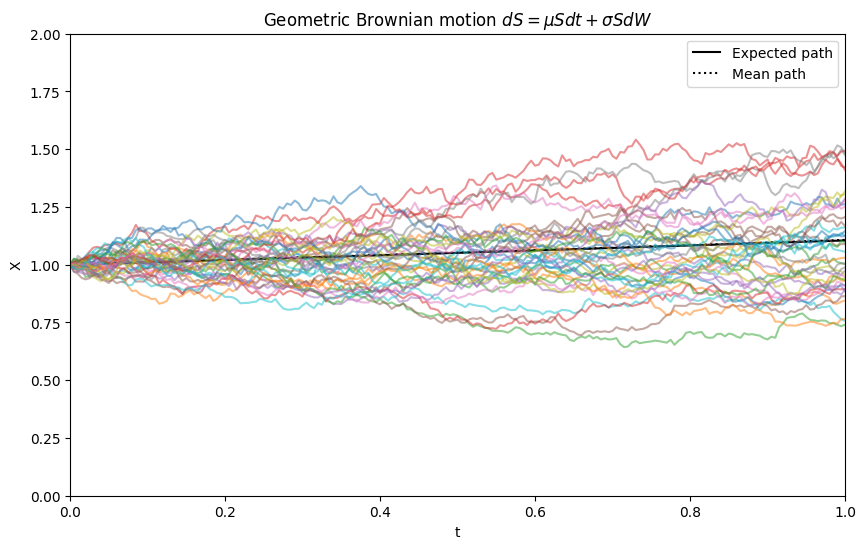

In [3]:
# Simulating the Geometric Brownian Motion
# Expected, mean, and sample paths
plt.figure(figsize=(10, 6))
EX = np.exp(mu * t)
plt.plot(t, EX, 'k', label='Expected path')
plt.plot(t, np.mean(S, axis=0), ':k', label='Mean path')
plt.plot(t, S[::500,:].T, alpha=0.5)
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([0, 2])
plt.xlim(min(t), max(t))
plt.title('Geometric Brownian motion $dS = \mu S dt + \sigma S dW$')

Text(0.5, 1.0, 'Comparing the theoretical mean of the ABM with the one estimated via MC')

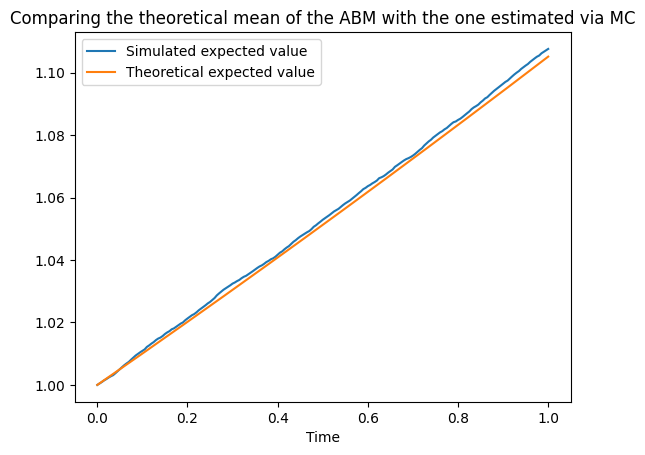

In [4]:
# Estimate mean of X(t) from the simulations and compare to the true one
plt.figure()
plt.plot(t, np.mean(S, axis=0), label='Simulated expected value')
plt.plot(t, EX, label='Theoretical expected value')
plt.xlabel('Time')
plt.legend(loc=0)
plt.title('Comparing the theoretical mean of the ABM with the one estimated via MC') 

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86794/4088494479.py:7: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel('$\ Var(X) = E[(X^2)-(E(X)^2)]$')


Text(0.5, 1.0, 'Arithmetic Brownian motion: Mean Square Deviation')

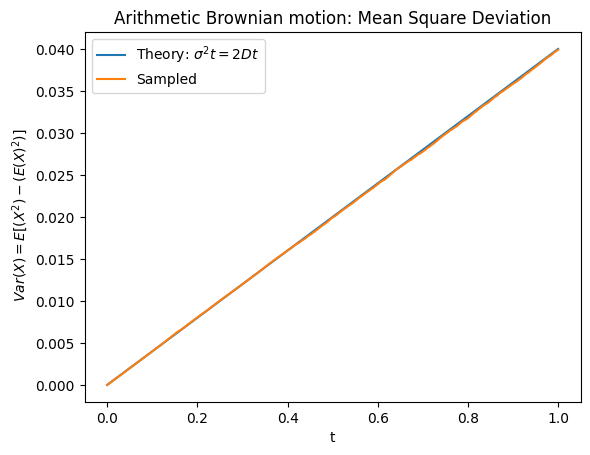

In [5]:
# Variance = mean square deviation = mean square displacement of random part
plt.figure()
plt.plot(t, sigma**2 * t, label='Theory: $\\sigma^2t = 2Dt$')
plt.plot(t, np.var(X, axis=0), label='Sampled')
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel('$\ Var(X) = E[(X^2)-(E(X)^2)]$')
plt.title('Arithmetic Brownian motion: Mean Square Deviation')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86794/737787724.py:3: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(t, sigma * np.sqrt(2 * t / np.pi), label='Theory: $\sigma(2t/\pi)^{1/2}$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_86794/737787724.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')


Text(0.5, 1.0, 'Arithmetic Brownian motion: Mean Absolute Deviation')

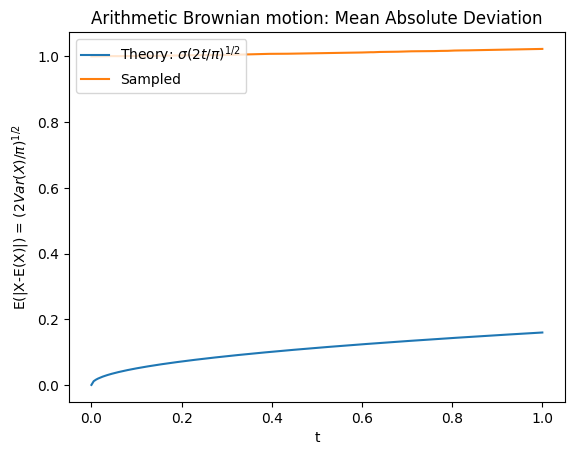

In [6]:
# Mean absolute deviation
plt.figure()
plt.plot(t, sigma * np.sqrt(2 * t / np.pi), label='Theory: $\sigma(2t/\pi)^{1/2}$')
plt.plot(t, np.mean(np.abs(X - EX), axis=0), label='Sampled')
plt.legend(loc='upper left')
plt.xlabel('t')
plt.ylabel('E(|X-E(X)|) = $(2Var(X)/\pi)^{1/2}$')
plt.title('Arithmetic Brownian motion: Mean Absolute Deviation')

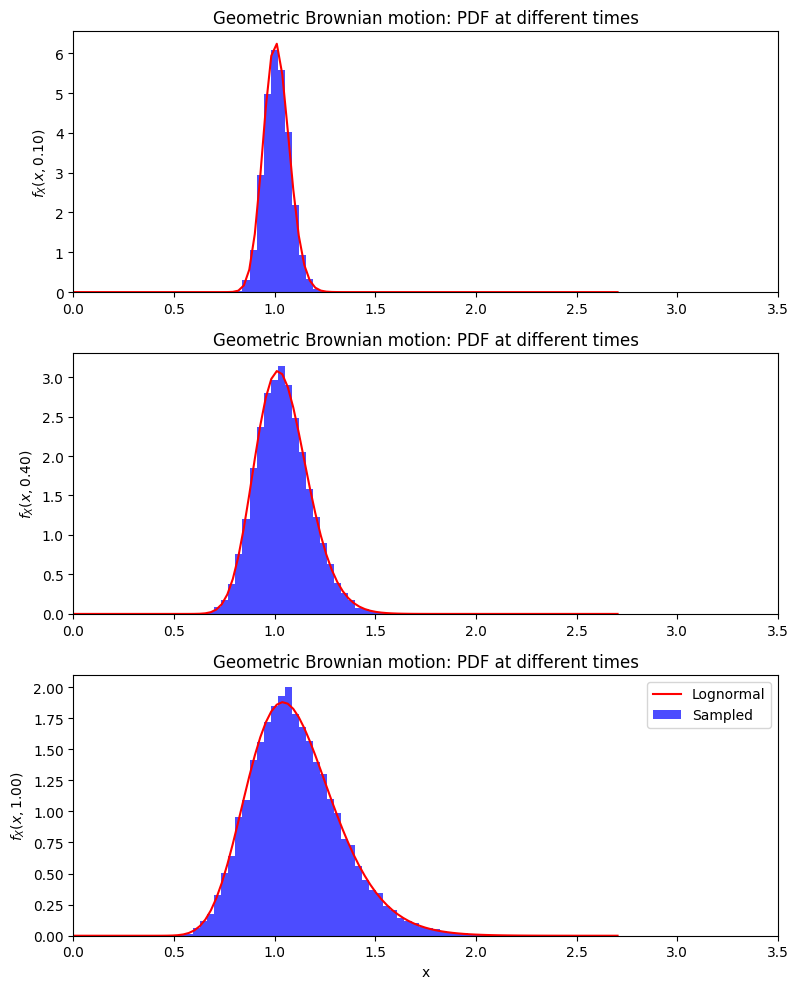

In [12]:
# Probability density function at different times
# nsample = 10000
# x = np.linspace(0,5,nsample)
# U = np.random.rand(nsample)
# X = -mu*np.log(U)
# plt.hist(X, bins=100, density=True, label='Sample')
# plt.plot(x,scipy.stats.lognorm.pdf(x, mu, sigma), 'r', label='Theory')

plt.figure(figsize=(8, 10))
for i, time_index in enumerate([20, 80, -1]):
    plt.subplot(3, 1, i + 1)
    
    #Theoretical PDF
    x = np.linspace(0,np.max(S),100)
    theoretical_density = scipy.stats.lognorm.pdf(x,
                                      sigma * np.sqrt(t[time_index]),
                                      scale=np.exp(np.log(S0) + (mu - sigma**2/2) * t[time_index]))
    plt.plot(x, theoretical_density, 'r', label='Lognormal')


    #Sampled
    plt.hist(S[:, time_index], bins=np.arange(0, 3.52, 0.035), density=True, color='blue', alpha=0.7, label='Sampled')
    plt.xlim([0, 3.5])
    # plt.ylim([0, 3.5])
    plt.ylabel(f'$f_X(x, {t[time_index]:.2f})$')
    plt.title('Geometric Brownian motion: PDF at different times')

plt.xlabel('x')
plt.legend(loc=0)
plt.tight_layout()

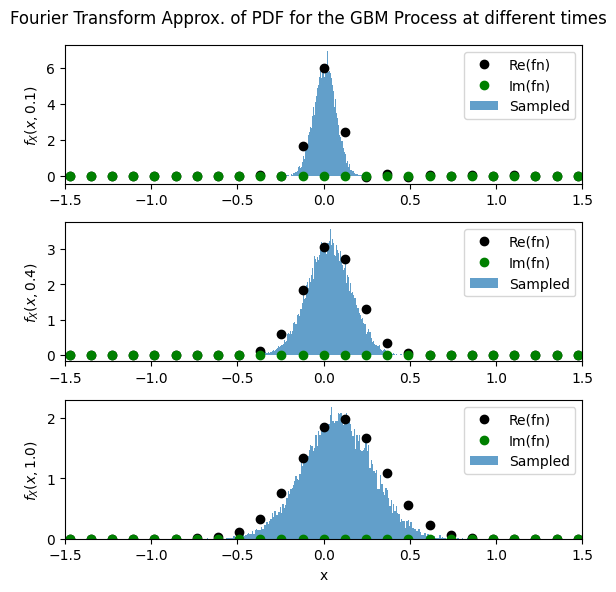

In [19]:
npaths = 20000  # number of paths
T = 1  # time horizon
nsteps = 200  # number of time steps
dt = T / nsteps  # time step
t = np.linspace(0, T, nsteps+1)  # observation times
mu = 0.1
sigma = 0.2
S0 = 1  # initial stock price

# Monte Carlo
dX = (mu - 0.5 * sigma**2) * dt + sigma * np.random.randn(npaths, nsteps) * np.sqrt(dt)
X = np.column_stack([np.zeros(npaths), np.cumsum(dX, axis=1)])

# FT Approx of Pdf using IFFT
t = np.linspace(0, T, nsteps + 1)
N = 512
dx = 0.1
upperx = N * dx
x = dx * np.arange(-N/2, N/2)
dxi = 2 * np.pi / (N * dx)
xi = dxi * np.arange(-N/2, N/2)

fig, ax = plt.subplots(3,1, figsize=(6,6))
for i,time in enumerate([20, 80, -1]):

    # Pulsation space: xi
    muABM=(mu-0.5*sigma**2)
    char_func = np.exp(1j*xi*muABM*t[time] - 0.5*(xi**2)*(sigma**2)*t[time])
    f_X = fftshift(fft(ifftshift(char_func))) / upperx

    ax[i].hist(X[:, time],density=True,bins=nsteps, alpha=0.7)
    ax[i].plot(xi,np.real(f_X), 'ko', linewidth=2)
    ax[i].plot(xi,np.imag(f_X), 'go')
    
    ax[i].set_ylabel(f'$f_X(x, {t[time]:.1f})$')
    ax[i].set_xlim(-1.5,1.5)
    ax[i].legend(['Re(fn)', 'Im(fn)','Sampled'])

plt.suptitle('Fourier Transform Approx. of PDF for the GBM Process at different times')
plt.xlabel('x')
plt.tight_layout()